In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
img = cv2.imread('/content/Fq8hA.png')
bg = cv2.imread ('/content/dbbpqj5-dfbf4e9d-e4d9-4c1c-81c6-fd8511db78d0.jpg')
print (img.shape, bg.shape)

(1080, 1920, 3) (1080, 1920, 3)


In [66]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

# CHROMA KEY IN HSV channel


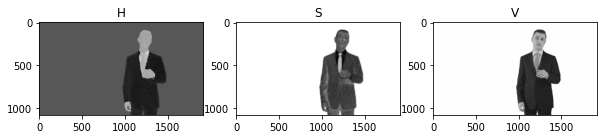

In [53]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

h = img_hsv[:, :, 0]
s = img_hsv[:, :, 1]
v = img_hsv[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))
ax1.set_title("H")
ax1.imshow(h, cmap="gray")
ax2.set_title("S")
ax2.imshow(s, cmap="gray")
ax3.set_title("V")
ax3.imshow(v, cmap="gray")
plt.show()

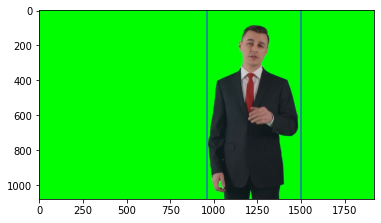

In [30]:
left = 960
right = 1500
plt.imshow(img)
plt.axvline(x = left)
plt.axvline(x = right)
plt.show()

In [54]:
img_flatten = []

for i in range (3):
    flatten_range = np.array (img_hsv[:,:left,i]).flatten()
    range_series = pd.Series(flatten_range)
    print (range_series.describe())
    img_flatten.append(range_series)

count    1036800.0
mean          60.0
std            0.0
min           60.0
25%           60.0
50%           60.0
75%           60.0
max           60.0
dtype: float64
count    1036800.0
mean         255.0
std            0.0
min          255.0
25%          255.0
50%          255.0
75%          255.0
max          255.0
dtype: float64
count    1036800.0
mean         254.0
std            0.0
min          254.0
25%          254.0
50%          254.0
75%          254.0
max          254.0
dtype: float64


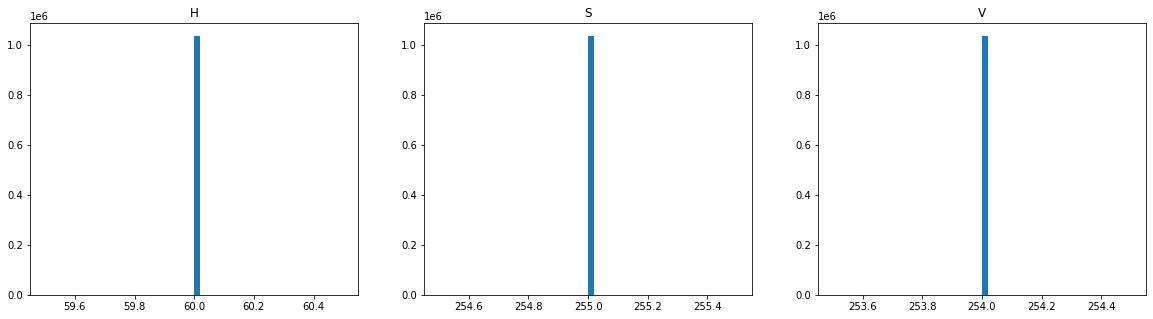

In [56]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.set_title("H")
ax1.hist(img_flatten[0], bins=50)
ax2.set_title("S")
ax2.hist(img_flatten[1], bins=50)
ax3.set_title("V")
ax3.hist(img_flatten[2], bins=50)
plt.show()

In [45]:
hsv_range = [60.0, 255.0, 254.0]

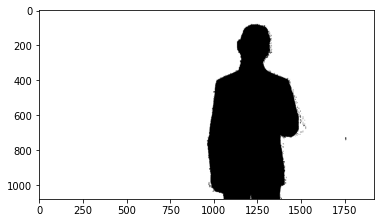

In [46]:
mask_lower = np.array(hsv_range)
mask_higher = np.array(hsv_range)

img_mask = cv2.inRange(img_hsv, mask_lower, mask_higher)
plt.imshow(img_mask, cmap="gray")
plt.show()

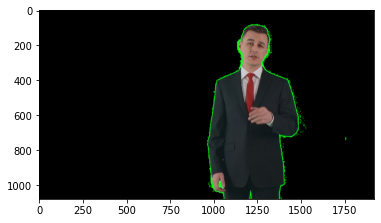

In [38]:
man_mask = np.copy(img)
man_mask[img_mask != 0] = [0, 0, 0]

plt.imshow(man_mask)
plt.show()

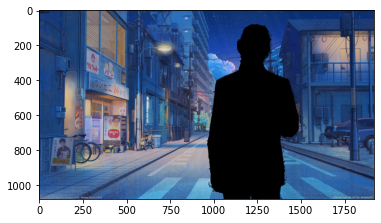

In [42]:
bg_masked = np.copy(bg)
bg_masked[img_mask == 0] = [0,0,0]

plt.imshow(bg_masked)
plt.show()

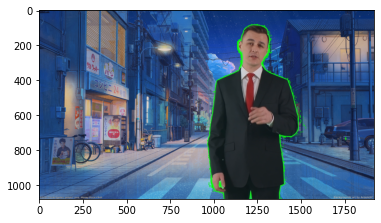

In [43]:
full_picture = bg_masked + man_mask

plt.imshow(full_picture)
plt.show()

# CHORMA KEY IN RGB CHANNEL

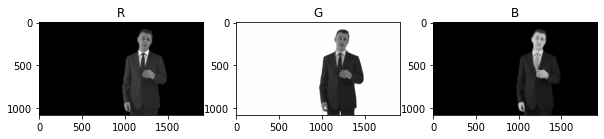

In [47]:
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))
ax1.set_title("R")
ax1.imshow(r, cmap="gray")
ax2.set_title("G")
ax2.imshow(g, cmap="gray")
ax3.set_title("B")
ax3.imshow(b, cmap="gray")
plt.show()

In [58]:
img_flatten = []

for i in range (3):
    flatten_range = np.array (img[:,:left,i]).flatten()
    range_series = pd.Series(flatten_range)
    print (range_series.describe())
    img_flatten.append(range_series)

count    1036800.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
dtype: float64
count    1036800.0
mean         254.0
std            0.0
min          254.0
25%          254.0
50%          254.0
75%          254.0
max          254.0
dtype: float64
count    1036800.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
dtype: float64


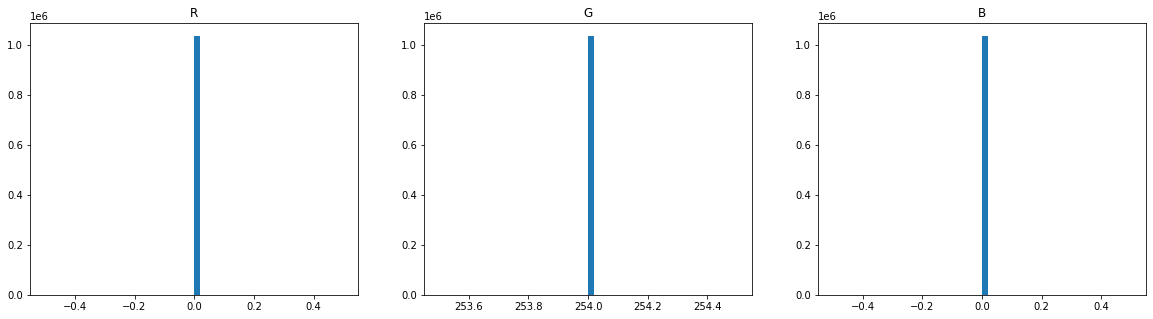

In [59]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.set_title("R")
ax1.hist(img_flatten[0], bins=50)
ax2.set_title("G")
ax2.hist(img_flatten[1], bins=50)
ax3.set_title("B")
ax3.hist(img_flatten[2], bins=50)
plt.show()

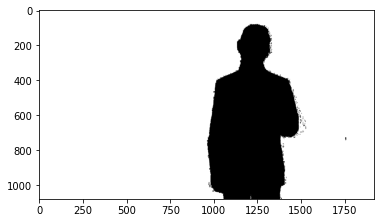

In [61]:
rgb_range = [0, 254, 0]

mask_lower = np.array(rgb_range)
mask_higher = np.array(rgb_range)

img_mask = cv2.inRange(img, mask_lower, mask_higher)
plt.imshow(img_mask, cmap="gray")
plt.show()

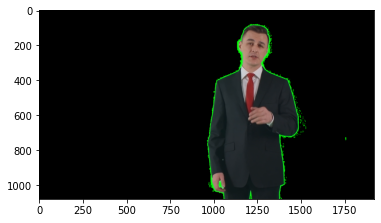

In [64]:
man_mask = np.copy(img)
man_mask[img_mask != 0] = [0, 0, 0]

plt.imshow(man_mask)
plt.show()

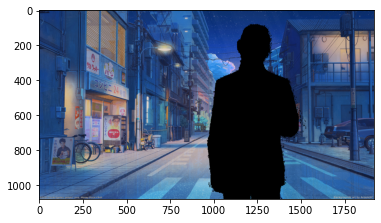

In [67]:
bg_masked = np.copy(bg)
bg_masked[img_mask == 0] = [0,0,0]

plt.imshow(bg_masked)
plt.show()

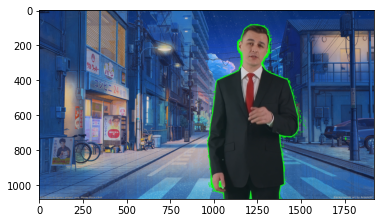

In [68]:
full_picture = cv2.bitwise_or(bg_masked, man_mask)

plt.imshow(full_picture)
plt.show()